# Preliminary operations

In [1]:
#@title Drive mount

from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/Assignment/OriginalDataset

Mounted at /content/gdrive
/content/gdrive/MyDrive/Assignment/OriginalDataset


In [2]:
#@title Main libraries
import pandas as pd
import numpy as np

import os
import random

from sklearn.utils import  compute_class_weight

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

In [3]:
#@title Reproducibility
# Setting a seed for reproducibility
seed = 90 
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print("The seed is: " + str(seed))

The seed is: 90


# Access data

### Data hyperparameters

In [4]:
data_hyperparameters = {
    'batch_size': 64,
    'resized_shape_height': 100,
    'resized_shape_width': 100,
    'color_mode': 'rgb' #'grayscale'
}

### Defining augmentation

In [5]:
# This function is used to create a dictionary with the hyperparameters of the augmentation 
def get_augmentation_hyperparameters(selected_dictionary):
  
  if selected_dictionary==0:
    augmentation_hyperparameters={}
    augmentation_hyperparameters['name']= 'Basic_Augmentation'
    augmentation_hyperparameters['rotation_range']= 45
    augmentation_hyperparameters['width_shift_range']= 0
    augmentation_hyperparameters['height_shift_range']= 0
    augmentation_hyperparameters['brightness_range']= [0.8, 1.2]
    augmentation_hyperparameters['horizontal_flip']= True
    augmentation_hyperparameters['vertical_flip']= False
    augmentation_hyperparameters['zoom_range']= [0.7, 1.2]
    augmentation_hyperparameters['rescale_range']= 1/255.
    augmentation_hyperparameters['fill_mode']= 'reflect'
    augmentation_hyperparameters['cval']= 0
    
  elif selected_dictionary==1:
    augmentation_hyperparameters={}
    augmentation_hyperparameters['name']= 'Aggressive_Augmentation'
    augmentation_hyperparameters['rotation_range']= 90
    augmentation_hyperparameters['width_shift_range']= 0.2
    augmentation_hyperparameters['height_shift_range']= 0.2
    augmentation_hyperparameters['brightness_range']= [0.5, 1.5]
    augmentation_hyperparameters['horizontal_flip']= True
    augmentation_hyperparameters['vertical_flip']= False
    augmentation_hyperparameters['zoom_range']= [0.5, 1.5]
    augmentation_hyperparameters['rescale_range']= 1/255.
    augmentation_hyperparameters['fill_mode']= 'reflect'
    augmentation_hyperparameters['cval']= 0

  elif selected_dictionary==2:
    augmentation_hyperparameters={}
    augmentation_hyperparameters['name']= 'Kind_Augmentation'
    augmentation_hyperparameters['rotation_range']= 0
    augmentation_hyperparameters['width_shift_range']= 0.1
    augmentation_hyperparameters['height_shift_range']= 0.1
    augmentation_hyperparameters['brightness_range']=  [0.9, 1.1]
    augmentation_hyperparameters['horizontal_flip']= True
    augmentation_hyperparameters['vertical_flip']= False
    augmentation_hyperparameters['zoom_range']= [0.9, 1.1]
    #augmentation_hyperparameters['rescale_range']= 1.
    augmentation_hyperparameters['fill_mode']= 'reflect'
    augmentation_hyperparameters['cval']= 0
  
  return augmentation_hyperparameters

In [6]:
dictionary = get_augmentation_hyperparameters(2)


aug_train_gen = ImageDataGenerator(
    rotation_range = dictionary['rotation_range'],
    height_shift_range = dictionary['height_shift_range'],
    width_shift_range = dictionary['width_shift_range'], 
    zoom_range = dictionary['zoom_range'],
    horizontal_flip = dictionary['horizontal_flip'],
    vertical_flip = dictionary['vertical_flip'], 
    fill_mode = dictionary['fill_mode'],
    cval = dictionary['cval'],
    #rescale = dictionary['rescale_range'],
    brightness_range = dictionary['brightness_range'],
    #preprocessing_function= preprocess_input)
)

### Data generators

In [7]:
dataset_dir = "splitted_dataset"
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

In [8]:
aug_training_set = aug_train_gen.flow_from_directory(directory = training_dir,
                                                  target_size = (data_hyperparameters['resized_shape_height'], data_hyperparameters['resized_shape_width']),
                                                  color_mode = data_hyperparameters['color_mode'],
                                                  class_mode = 'categorical',
                                                  batch_size = data_hyperparameters['batch_size'],
                                                  shuffle = True,
                                                  seed = seed)

noaug_training_set = ImageDataGenerator().flow_from_directory(directory = training_dir,
                                                                              target_size = (data_hyperparameters['resized_shape_height'], data_hyperparameters['resized_shape_width']),
                                                                              color_mode = data_hyperparameters['color_mode'],
                                                                              class_mode = 'categorical',
                                                                              batch_size = data_hyperparameters['batch_size'],
                                                                              shuffle = True,
                                                                              seed = seed)

validation_set = ImageDataGenerator().flow_from_directory(directory = validation_dir,
                                                                target_size = (data_hyperparameters['resized_shape_height'], data_hyperparameters['resized_shape_width']),
                                                                color_mode = data_hyperparameters['color_mode'],
                                                                class_mode = 'categorical',
                                                                batch_size = data_hyperparameters['batch_size'],
                                                                shuffle = False,
                                                                seed = seed)
test_set = ImageDataGenerator().flow_from_directory(directory = test_dir,
                                                                target_size = (data_hyperparameters['resized_shape_height'], data_hyperparameters['resized_shape_width']),
                                                                color_mode = data_hyperparameters['color_mode'],
                                                                class_mode = 'categorical',
                                                                batch_size = data_hyperparameters['batch_size'],
                                                                shuffle = False,
                                                                seed = seed)


Found 11124 images belonging to 3 classes.
Found 11124 images belonging to 3 classes.
Found 1253 images belonging to 3 classes.
Found 3093 images belonging to 3 classes.


In [9]:
# @title Target labels
labels = list(aug_training_set.class_indices.keys())
print("Labels: ", labels)

Labels:  ['normal', 'pneumonia', 'tubercolosis']


# Model definition

In [ ]:
def build_tl_model(input_shape, supernet_input_shape, n_output, dp_rate1=0.3, dp_rate2=0.3, nc=512, elastic_lambda= 1e-3,  lr = 1e-3):

  supernet = tfk.applications.EfficientNetV2S(
    include_top=False,
    weights="imagenet",
    input_shape= supernet_input_shape,
    include_preprocessing=True,
    pooling='avg')

  # Use the supernet as feature extractor
  supernet.trainable = False

  inputs = tfk.Input(shape=input_shape)
  x = tfk.applications.efficientnet_v2.preprocess_input(inputs)

  x = supernet(inputs)
  x = tfkl.Dropout(dp_rate1, seed=seed)(x)   
  x = tfkl.Dense( 
      units=nc, 
      kernel_initializer = tfk.initializers.HeUniform(seed),
      kernel_regularizer=tf.keras.regularizers.L1L2(elastic_lambda,elastic_lambda))(x)
  x=tfkl.LeakyReLU()(x)
  x = tfkl.Dropout(dp_rate2, seed=seed)(x)  
  outputs = tfkl.Dense(
      n_output, 
      activation='softmax',
      kernel_initializer = tfk.initializers.GlorotUniform(seed))(x)

  # Connect input and output through the Model class
  tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

  return tl_model

In [ ]:
def unfreeze_layers(tl_model, untill, supernet_name,lr):

  tl_model.get_layer(supernet_name).trainable = True
  for i, layer in enumerate(tl_model.get_layer(supernet_name).layers[:untill]):
    layer.trainable=False
  for i, layer in enumerate(tl_model.get_layer(supernet_name).layers):
    print(i, layer.name, layer.trainable)

  tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(lr), metrics=['accuracy', 'Precision', 'Recall'])

  return tl_model

In [ ]:
# @title Building the model

n_channels = 1 if data_hyperparameters['color_mode']=='grayscale' else 3
input_shape = (data_hyperparameters['resized_shape_height'],data_hyperparameters['resized_shape_width'],n_channels) 
n_output = len(labels)

print(input_shape)
print(n_output)

(100, 100, 3)
3


In [ ]:
EffNet_model = build_tl_model(input_shape, supernet_input_shape=input_shape, n_output=n_output, dp_rate1=0.3, dp_rate2=0.3, nc=512, elastic_lambda= 1e-3,  lr = 1e-3)
EffNet_model = unfreeze_layers(EffNet_model, untill=480, supernet_name='efficientnetv2-s', lr = 1e-3)
EffNet_model.summary()

0 input_3 False
1 rescaling_1 False
2 stem_conv False
3 stem_bn False
4 stem_activation False
5 block1a_project_conv False
6 block1a_project_bn False
7 block1a_project_activation False
8 block1a_add False
9 block1b_project_conv False
10 block1b_project_bn False
11 block1b_project_activation False
12 block1b_drop False
13 block1b_add False
14 block2a_expand_conv False
15 block2a_expand_bn False
16 block2a_expand_activation False
17 block2a_project_conv False
18 block2a_project_bn False
19 block2b_expand_conv False
20 block2b_expand_bn False
21 block2b_expand_activation False
22 block2b_project_conv False
23 block2b_project_bn False
24 block2b_drop False
25 block2b_add False
26 block2c_expand_conv False
27 block2c_expand_bn False
28 block2c_expand_activation False
29 block2c_project_conv False
30 block2c_project_bn False
31 block2c_drop False
32 block2c_add False
33 block2d_expand_conv False
34 block2d_expand_bn False
35 block2d_expand_activation False
36 block2d_project_conv False
37 bl

# Model training

In [10]:
train_gen = aug_training_set
valid_gen = validation_set
test_gen = test_set

train_target = train_gen.classes
val_target = valid_gen.classes
test_target = test_gen.classes

train_target_cat = tfk.utils.to_categorical(train_gen.classes)
val_target_cat = tfk.utils.to_categorical(valid_gen.classes)
test_target_cat = tfk.utils.to_categorical(test_gen.classes)

In [ ]:
epochs = 200
bs = data_hyperparameters['batch_size']
class_weights = dict(zip(np.unique(train_target), compute_class_weight(class_weight = "balanced", classes = np.unique(train_target), y = train_target)))
monmtr = 'val_accuracy'

In [ ]:
history = EffNet_model.fit(
    x = train_gen,
    epochs = epochs,
    #class_weight = class_weights,
    batch_size = bs, 
    validation_data = valid_gen,
    callbacks=[
        tfk.callbacks.EarlyStopping(monitor=monmtr, patience=20, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor=monmtr, patience=3, factor=0.5, min_lr=1e-8),
    ] 
).history

Epoch 1/200
174/174 [==============================] - 890s 5s/step - loss: 5.7905 - accuracy: 0.8418 - precision: 0.8571 - recall: 0.8149 - val_loss: 0.6428 - val_accuracy: 0.9074 - val_precision: 0.9169 - val_recall: 0.8986 - lr: 0.0010
Epoch 2/200
174/174 [==============================] - 180s 1s/step - loss: 0.6570 - accuracy: 0.8791 - precision: 0.8908 - recall: 0.8667 - val_loss: 0.5513 - val_accuracy: 0.9090 - val_precision: 0.9168 - val_recall: 0.8970 - lr: 0.0010
Epoch 3/200
174/174 [==============================] - 179s 1s/step - loss: 0.6033 - accuracy: 0.8892 - precision: 0.8967 - recall: 0.8820 - val_loss: 0.5336 - val_accuracy: 0.9186 - val_precision: 0.9226 - val_recall: 0.9138 - lr: 0.0010
Epoch 4/200
174/174 [==============================] - 179s 1s/step - loss: 0.5666 - accuracy: 0.8974 - precision: 0.9033 - recall: 0.8901 - val_loss: 0.4758 - val_accuracy: 0.9250 - val_precision: 0.9290 - val_recall: 0.9194 - lr: 0.0010
Epoch 5/200
174/174 [=======================

In [ ]:
EffNet_model.save("models/EffNet_model_03012023") #save the model

# Model evaluation

In [11]:
def evaluate_model_m(model, test_set, target):

  """ Function used to evaluate model's performances on the local test set, display of confusion matrix """
  """ Model from trained model variable """

  labels = list(test_set.class_indices.keys())
  
  predictions = model.predict(test_set)
  metrics= {
    "predictions" : predictions,
    "target": target,
    "cm": confusion_matrix(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), normalize='true', ),
    "accuracy" : accuracy_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1)),
    "precision" : precision_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), average='macro'),
    "recall" : recall_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), average='macro'),
    "f1" : f1_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), average='macro')  }
  
  print("Accuracy: "+ str(metrics["accuracy"]))
  print("F1 score: "+ str(metrics["f1"]))
  cm = metrics["cm"]
  plt.figure(figsize=(15,15))
  sns.heatmap(cm.T, annot=True, fmt='.2f', xticklabels=list(labels), yticklabels=list(labels))
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()

  return metrics

49/49 [==============================] - 340s 7s/step
Accuracy: 0.9466537342386033
F1 score: 0.9227899952069984


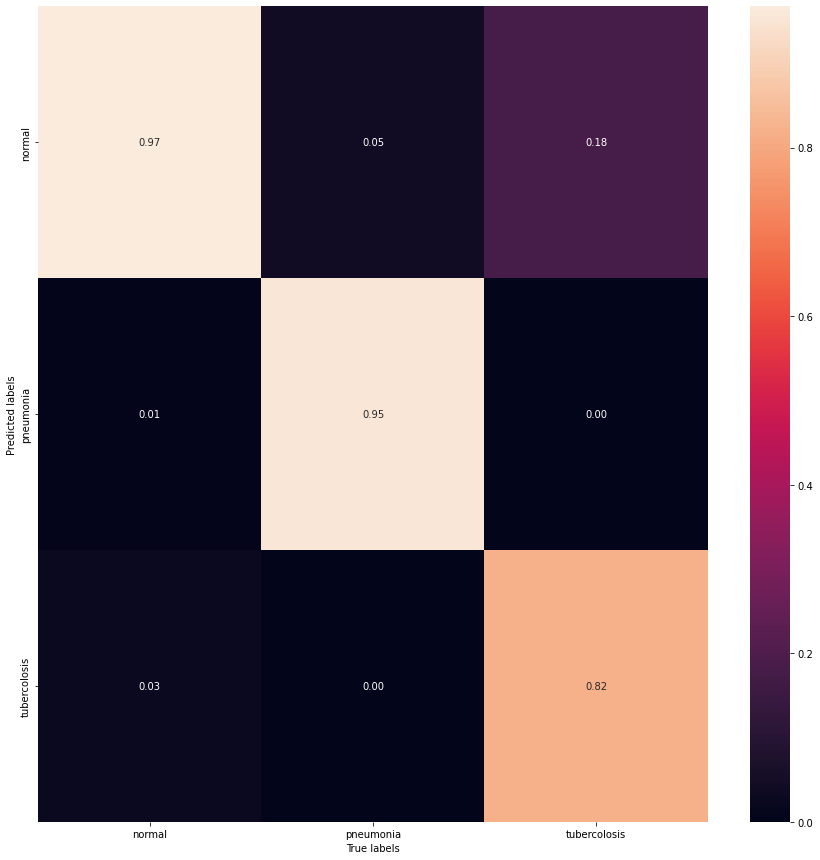

In [13]:
# m = EffNet_model
m = tfk.models.load_model("models/EffNet_model_03012023")
# ret = evaluate_model_m(m, train_gen, train_target_cat)
# ret = evaluate_model_m(m, valid_gen, val_target_cat)
ret = evaluate_model_m(m, test_gen, test_target_cat)

In [14]:
np.save('/content/gdrive/MyDrive/AI project/models/predictions_effnet03012023.npy', ret['predictions'])